# A tricky thing here is the difference between first visits and multiple visits essentially, because the animals have biases 


You could quantify this with a likelihood based approach. This would be the cleanest. You can calculate under.

In effect you don't need them to be making the correct decision at each point, you need them to be more likely to make the correct decision that when they are following a policy that leads them to the correct reward. This could change the results in either direction

You could also quantify this as being between having learned the correct policy and not.

## Analysing it more complicatedly


There are several ways of calculating this. Could compare this to the marginal distribution of all states. Could compare it to the marginal transition matrix.

Ok, so the answer here is complicated. What we therefore need to do is quantify the biases. 

- Quantify stability of biases within session
- Quantify the stability of across session biases
- Quantify these conditional on reward location

My sense is to compare it to the transition matrix distribution calculated for the reward location that preceeded the trial across the entire session


## Unaswered questions

 - What is the null distribution, when you don't directly calculate fraction correct but calculate it against the empirical transition probabilities.
 - What do you do about transitions where in states that were rewarded??
 
 The null hypothesis is that the data
 
 
Really need to think carefully about how to rule out that this is driven by one step transitions

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import scipy.stats as stt
seaborn.set(font_scale=1.5,style='ticks')
import os
import re
import sys
import itertools
import functools
import networkx as nx
from datetime import date, timedelta
from datetime import datetime
from statsmodels.stats import proportion
clrs = seaborn.color_palette(n_colors=6)

sys.path.append(r"C:\Users\yweissenberger\Documents\code\line_loop-master")
sys.path.append(r"C:\Users\yweissenberger\Documents\code\line_loop-master\packages")
sys.path.append("/Users/yves/Documents/Code/line_loop/packages/")

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import mouse_poker as mpk

In [3]:
#physical position of the pokes. In terms of numbering, the pokes are numbered as follows
#(or in some cases the indexing starts from 0 rather than 1)

"""
     1
   2   3
 4   5   6 
   7   8
     9
"""

#physical positions of the pokes, used for drawing the graphs
#with nodes and edges. The distances here are to scale with
#the real thing.
poke_pos = [ [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]

In [4]:
from mouse_poker.navi import *

# Batch Version 

# Run on first block version 

In [5]:
all_Fs_sets = []

ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_4_RUNNAVI/'
allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
allFs = [i for i in allFs if not os.path.isdir(i)]
all_Fs_sets.append(allFs)


ROOT = '/Users/yves/Documents/behavior_data/line_loop_cohort_1/line_loop_batch_4_RUNNAVI/'
allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
allFs = [i for i in allFs if not os.path.isdir(i)]
all_Fs_sets[0].extend(allFs)
#all_Fs_sets.append(allFs)


ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI/'
allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
allFs = [i for i in allFs if not os.path.isdir(i)]
allFs = [i for i in allFs if '456675' in i]

all_Fs_sets.append(allFs)

ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI/'
allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
allFs = [i for i in allFs if not os.path.isdir(i)]
allFs = [i for i in allFs if '460175' in i]

all_Fs_sets.append(allFs)

ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI_males/'
allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
allFs = [i for i in allFs if not os.path.isdir(i)]
allFs = [i for i in allFs if '456674_30' in i]
all_Fs_sets.append(allFs)



#ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI_males/'
#allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
#allFs = [i for i in allFs if not os.path.isdir(i)]
#allFs = [i for i in allFs if '456674_1' in i]
#all_Fs_sets.append(allFs)

#subjects = ['456675_3\nround1','456675_3\nround2','456675_10','460175_10']
subjects = ['456675_3','456675_10','460175_10','456674_30']


In [6]:
#ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI_males/'
#allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
#allFs = [i for i in allFs if not os.path.isdir(i)]
#allFs

In [7]:
#ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_4_RUNNAVI/'
#allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
#allFs = [i for i in allFs if not os.path.isdir(i)]


In [8]:
param_combos = [[True,True],[True,False],[False,True],[False,False]]

In [9]:
all_param_res = []
for ign_d,ign_f in param_combos:
    allres = []

    for allFs in all_Fs_sets:
        perf,trial_ctr = first_block_model_based_batch(allFs,
                                                       ignore_distance=ign_d,
                                                       ignore_first_visit=ign_f,)
        if trial_ctr==0: trial_ctr = np.nan
        allres.append([perf/trial_ctr,perf,trial_ctr,ign_d==False,ign_f==False])
    all_param_res.append(allres)

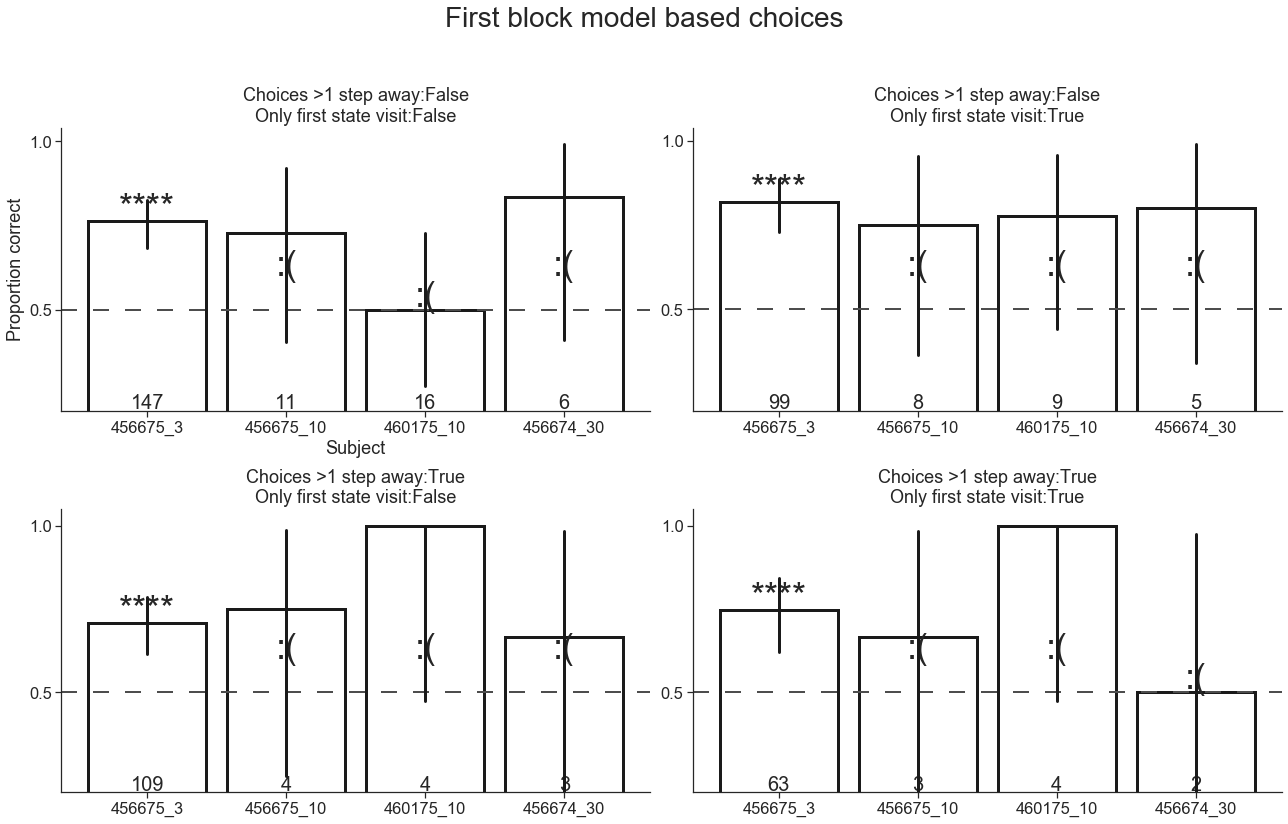

In [10]:
plt.figure(figsize=(18,12))
plt.suptitle("First block model based choices",size=28)
for kk,allres in enumerate(all_param_res):
    
    plt.subplot(2,2,kk+1)
    plt.title("Choices >1 step away:{}\nOnly first state visit:{}".format(allres[0][-2],allres[0][-1]))

    mu = np.array([i[0] for i in allres])
    ci = np.array([np.array(proportion.proportion_confint(i[1],i[2],alpha=.05,method='binom_test')) for i in allres])
    pvals = [stt.binom_test(i[1],i[2]) for i in allres]

    for subj_ix in range(len(subjects)):
        plt.plot([subj_ix]*2,ci[subj_ix],color='k',linewidth=3,zorder=100)
        plt.gca().annotate(str(allres[subj_ix][2]),(subj_ix,.205),ha='center',size=20)
        pvalue = pvals[subj_ix]
        if pvalue<0.05:
            print_text = '*'*int(np.clip(np.floor(0.05/pvalue),0,4))
            plt.gca().annotate(print_text,(subj_ix,np.clip(mu[subj_ix]+.01,0,.9)),size=36, ha='center')
        else:
            plt.gca().annotate(':(',(subj_ix,np.clip(mu[subj_ix]+.01,0,.6)),size=36, ha='center')

    #plt.errorbar(range(4),mu,yerr=(mu[:,None]+ci).T,color='k',linewidth=0,elinewidth=3)
    plt.bar(range(len(allres)),[i[0] for i in allres],facecolor='w',edgecolor='k',linewidth=3,width=.85)
    plt.ylim(.2)
    plt.axhline(y=0.5,dashes=(8,8),color='.3',linewidth=2)
    if kk==0:
        plt.ylabel("Proportion correct")
        plt.xlabel("Subject")
    plt.xticks(range(len(allres)),subjects)
    plt.locator_params('y',nbins=3)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
seaborn.despine()

## Analyse after first block

In [11]:
all_param_res = []
for ign_d,ign_f in param_combos:
    allres = []

    for allFs in all_Fs_sets:
        res_= model_based_batch(allFs,ignore_distance=ign_d,ignore_first_visit=ign_f)
        perf, trial_ctr, prob_array_for_pois_binom, choices  = res_
        pbd = PoissonBinomial(prob_array_for_pois_binom)
        pval = np.abs(pbd.x_or_more(np.sum(choices)))
        #print(pval,perf,trial_ctr,perf/trial_ctr)

        allres.append([perf/trial_ctr,perf,trial_ctr,pval,np.mean(prob_array_for_pois_binom),ign_d==False,ign_f==False])
    all_param_res.append(allres)

/Users/yves/Documents/Code/line_loop/packages/mouse_poker/navi/navi.py:228: RuntimeWarning: invalid value encountered in true_divide
  for i in range(9)])


8 0 False
8 0 False
8 0 False
8 0 False


In [12]:
staticmethod

staticmethod

[5.734118918393666e-16, 2.0638761355211244e-17, 2.9408340555120427e-07, 0.014322395360906159]
[4.4298529491080467e-16, 2.3491047070519264e-18, 1.545542639383446e-08, 0.2776638950108337]
[4.3000153259748814e-08, 1.1275702593849246e-16, 0.01839907196743646, 0.27526795963089407]
[0.021485844019216733, 2.874684617332995e-17, 0.14910833111525143, 1.0]


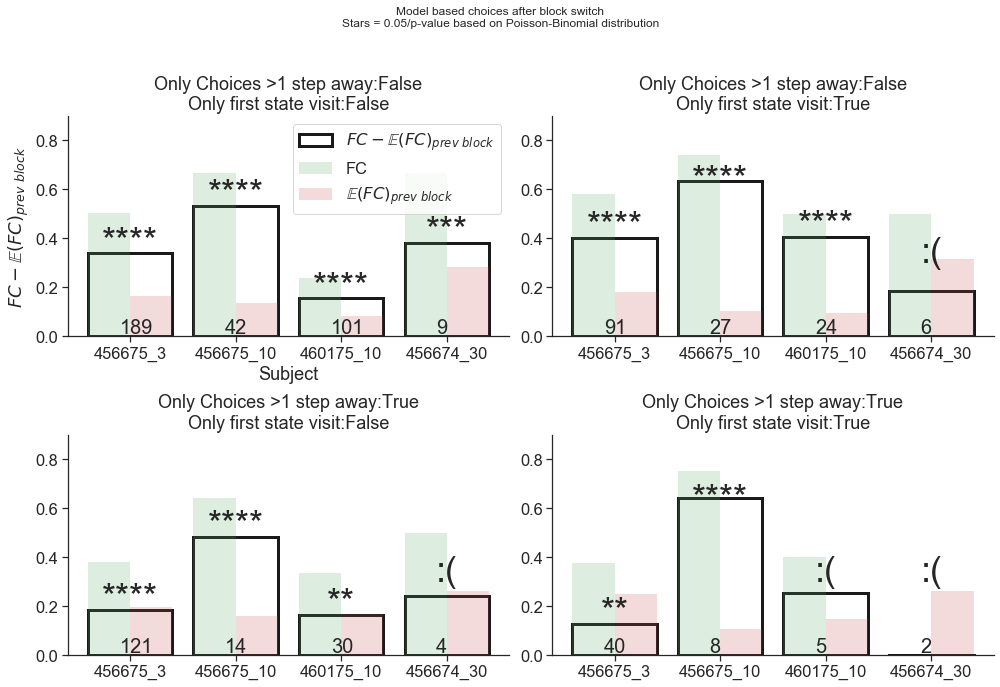

In [13]:
plt.figure(figsize=(14,10))
plt.suptitle("Model based choices after block switch\nStars = 0.05/p-value based on Poisson-Binomial distribution")
for kk,allres in enumerate(all_param_res):
    
    plt.subplot(2,2,kk+1)
    plt.title("Only Choices >1 step away:{}\nOnly first state visit:{}".format(allres[0][-2],allres[0][-1]))

    mu = np.array([i[0]-i[4] for i in allres])
    #ci = np.array([np.array(proportion.proportion_confint(i[1],i[2])) for i in allres])
    print([i[3] for i in allres])
    for subj_ix in range(len(subjects)):
        #plt.plot([subj_ix]*2,ci[subj_ix],color='k',linewidth=3,zorder=100)
        plt.gca().annotate(str(allres[subj_ix][2]),(subj_ix-.1,0.01),size=20)
        pvalue_pbd = allres[subj_ix][3]
        if pvalue_pbd<0.05:
            print_text = '*'*int(np.clip(np.floor(0.05/pvalue_pbd),0,4))
            plt.gca().annotate(print_text,(subj_ix,np.clip(mu[subj_ix]+.01,0,.6)),size=36, ha='center')
        else:
            plt.gca().annotate(':(',(subj_ix,np.clip(mu[subj_ix]+.01,.3,.6)),size=36, ha='center')



    #plt.errorbar(range(4),mu,yerr=(mu[:,None]+ci).T,color='k',linewidth=0,elinewidth=3)
    plt.bar(np.arange(len(subjects)),mu,facecolor='w',edgecolor='k',linewidth=3,width=.8,label="$FC - \mathbb{E}(FC)_{prev \ block}$")
    plt.bar(np.arange(len(subjects))-.4,[i[0] for i in allres],facecolor=clrs[2],
            edgecolor='k',linewidth=0,width=.4,alpha=.2,align='edge',label='FC')
    plt.bar(np.arange(len(subjects)),[i[4] for i in allres],facecolor=clrs[3],
            edgecolor='k',linewidth=0,width=.4,alpha=.2,align='edge',label='$\mathbb{E}(FC)_{prev \ block}$')

    if kk==0:
        plt.legend()

    plt.ylim(0,.9)
    #plt.ylim()
    #plt.axhline(y=0.5,dashes=(8,8),color='.3',linewidth=2)
    if kk==0:
        plt.ylabel("$FC - \mathbb{E}(FC)_{prev \ block}$")
        plt.xlabel("Subject")
    plt.xticks(range(4),subjects)
    #plt.yscale('log')
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
seaborn.despine()

[0.00040311093187137985, 2.1587669923266932e-16, 2.7755575615628914e-17, 0.5346639437548528]
[0.00026798557521818677, 2.0816681711721685e-16, 2.7755575615628914e-17, 0.5346639437548528]
[0.14223217200713947, 0.008433985839233424, 0.0, 1.0]
[0.09207814399508617, 1.1102230246251565e-16, 0.0, 1.0]


/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


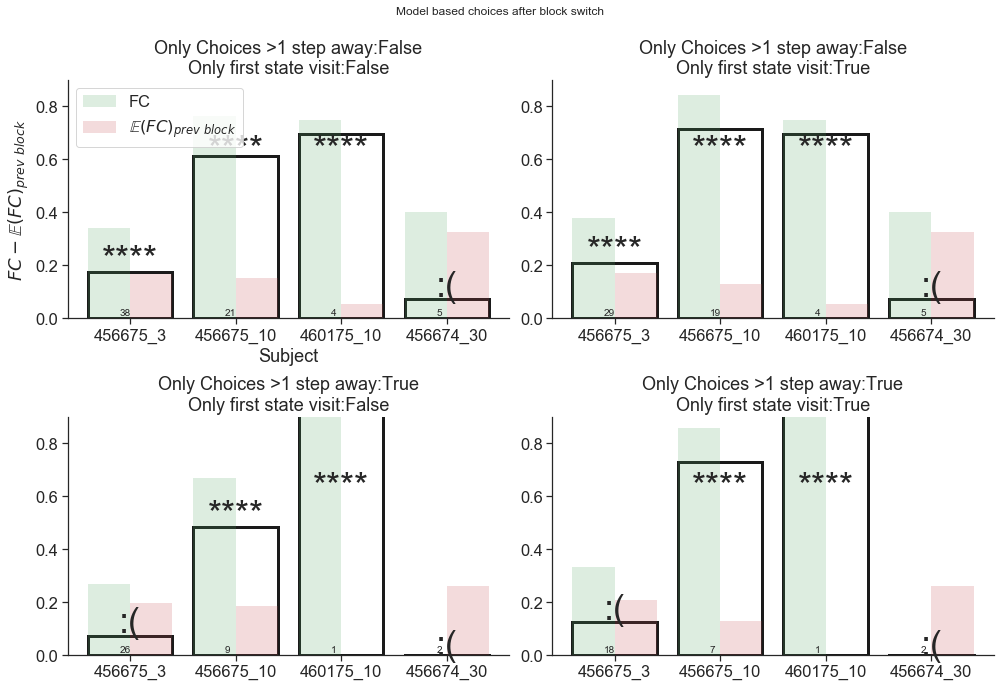

In [13]:
plt.figure(figsize=(14,10))
plt.suptitle("Model based choices after block switch\n\n")
for kk,allres in enumerate(all_param_res):
    
    plt.subplot(2,2,kk+1)
    plt.title("Only Choices >1 step away:{}\nOnly first state visit:{}".format(allres[0][-2],allres[0][-1]))

    mu = np.array([i[0]-i[4] for i in allres])
    #ci = np.array([np.array(proportion.proportion_confint(i[1],i[2])) for i in allres])
    print([i[3] for i in allres])
    for subj_ix in range(len(subjects)):
        #plt.plot([subj_ix]*2,ci[subj_ix],color='k',linewidth=3,zorder=100)
        plt.gca().annotate(str(allres[subj_ix][2]),(subj_ix-.1,0.01))
        pvalue_pbd = allres[subj_ix][3]
        if pvalue_pbd<0.05:
            print_text = '*'*int(np.clip(np.floor(0.05/pvalue_pbd),0,4))
            plt.gca().annotate(print_text,(subj_ix,np.clip(mu[subj_ix]+.01,0,.6)),size=36, ha='center')
        else:
            plt.gca().annotate(':(',(subj_ix,np.clip(mu[subj_ix]+.01,0,.6)),size=36, ha='center')



    #plt.errorbar(range(4),mu,yerr=(mu[:,None]+ci).T,color='k',linewidth=0,elinewidth=3)
    plt.bar(np.arange(len(subjects)),mu,facecolor='w',edgecolor='k',linewidth=3,width=.8)
    plt.bar(np.arange(len(subjects))-.4,[i[0] for i in allres],facecolor=clrs[2],
            edgecolor='k',linewidth=0,width=.4,alpha=.2,align='edge',label='FC')
    plt.bar(np.arange(len(subjects)),[i[4] for i in allres],facecolor=clrs[3],
            edgecolor='k',linewidth=0,width=.4,alpha=.2,align='edge',label='$\mathbb{E}(FC)_{prev \ block}$')

    if kk==0:
        plt.legend()

    plt.ylim(0,.9)
    #plt.ylim()
    #plt.axhline(y=0.5,dashes=(8,8),color='.3',linewidth=2)
    if kk==0:
        plt.ylabel("$FC - \mathbb{E}(FC)_{prev \ block}$")
        plt.xlabel("Subject")
    plt.xticks(range(4),subjects)
    #plt.yscale('log')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
seaborn.despine()

In [937]:
5/8

0.625

In [939]:
stt.binom_test(5,8,p=.2)

0.010406400000000001

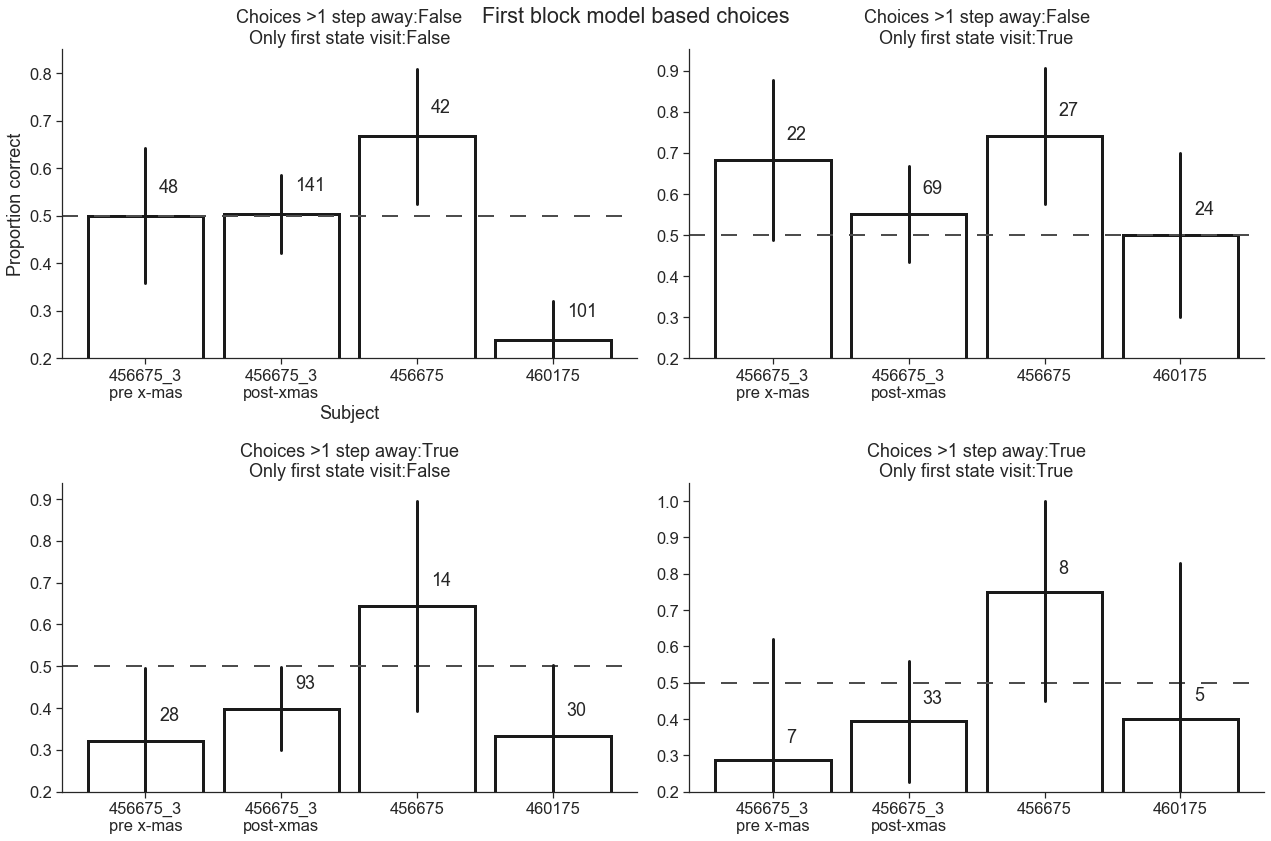

In [713]:
plt.figure(figsize=(18,12))
plt.suptitle("First block model based choices")
for kk,allres in enumerate(all_param_res):
    
    plt.subplot(2,2,kk+1)
    plt.title("Choices >1 step away:{}\nOnly first state visit:{}".format(allres[0][-2],allres[0][-1]))

    mu = np.array([i[0] for i in allres])
    ci = np.array([np.array(proportion.proportion_confint(i[1],i[2])) for i in allres])

    for subj_ix in range(len(subjects)):
        plt.plot([subj_ix]*2,ci[subj_ix],color='k',linewidth=3,zorder=100)
        plt.gca().annotate(str(allres[subj_ix][2]),(subj_ix+.1,allres[subj_ix][0]+.05))

    #plt.errorbar(range(4),mu,yerr=(mu[:,None]+ci).T,color='k',linewidth=0,elinewidth=3)
    plt.bar(range(4 ),[i[0] for i in allres],facecolor='w',edgecolor='k',linewidth=3,width=.85)
    plt.ylim(.2)
    plt.axhline(y=0.5,dashes=(8,8),color='.3',linewidth=2)
    if kk==0:
        plt.ylabel("Proportion correct")
        plt.xlabel("Subject")
    plt.xticks(range(4),subjects)
plt.tight_layout()
seaborn.despine()

In [704]:
allres[]

[[0.2857142857142857, 2, 7, True, True],
 [0.3939393939393939, 13, 33, True, True],
 [0.75, 6, 8, True, True],
 [0.4, 2, 5, True, True]]